In [2]:
!wget https://openaipublic.blob.core.windows.net/lm-human-preferences/labels/tldr/offline_60k.json

--2023-11-06 14:12:46--  https://openaipublic.blob.core.windows.net/lm-human-preferences/labels/tldr/offline_60k.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287138709 (274M) [application/json]
Saving to: ‘offline_60k.json’

offline_60k.json    100%[===================>] 273.84M  6.24MB/s    in 55s     

2023-11-06 14:13:42 (4.94 MB/s) - ‘offline_60k.json’ saved [287138709/287138709]



In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.8 MB/s eta 0:00:00


In [3]:
!wget https://openaipublic.blob.core.windows.net/lm-human-preferences/labels/tldr/online_45k.json


--2023-11-06 14:13:43--  https://openaipublic.blob.core.windows.net/lm-human-preferences/labels/tldr/online_45k.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.150.77.132
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.150.77.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218425452 (208M) [application/json]
Saving to: ‘online_45k.json’

online_45k.json     100%[===================>] 208.31M  3.65MB/s    in 35s     

2023-11-06 14:14:19 (5.88 MB/s) - ‘online_45k.json’ saved [218425452/218425452]



In [1]:
import json
from tqdm import tqdm

In [85]:
with open('offline_60k.json') as f:
    data = json.load(f)

In [86]:
len(data)

60055

In [87]:
from transformers import GPT2Tokenizer

In [88]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [ ]:
def filter_list(list, id):
    return [i for i in list if i != id]

In [89]:
rows = []
for example in data:
    query = tokenizer.decode(filter_list(example['query'], 50259))
    sample0 = tokenizer.decode(filter_list(example['sample0'], 50259))
    sample1 = tokenizer.decode(filter_list(example['sample1'], 50259))
    sample2 = tokenizer.decode(filter_list(example['sample2'], 50259))
    sample3 = tokenizer.decode(filter_list(example['sample3'], 50259))
    label = example['best']
    rows.append([query, sample0, sample1, sample2, sample3, label])

In [91]:
import csv
with open("offline_60k_raw.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Query", "Sample_0", "Sample_1", "Sample_2", "Sample_3", "Best"])
        writer.writerows(rows)

In [92]:
with open('online_45k.json') as f:
    data = json.load(f)

In [93]:
rows = []
for example in data:
    query = tokenizer.decode(filter_list(example['query'], 50259))
    sample0 = tokenizer.decode(filter_list(example['sample0'], 50259))
    sample1 = tokenizer.decode(filter_list(example['sample1'], 50259))
    sample2 = tokenizer.decode(filter_list(example['sample2'], 50259))
    sample3 = tokenizer.decode(filter_list(example['sample3'], 50259))
    label = example['best']
    rows.append([query, sample0, sample1, sample2, sample3, label])

In [94]:
with open("online_45k_raw.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Query", "Sample_0", "Sample_1", "Sample_2", "Sample_3", "Best"])
        writer.writerows(rows)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_60k = pd.read_csv("offline_60k_raw.csv", header=0)

In [4]:
raw_60k.head(5)

,Query,Sample_0,Sample_1,Sample_2,Sample_3,Best
0,Don't be foolish. This kind of strawmanning o...,Not the end goal of communism.\n\nPlease note...,\n\nCapitalism is a privately held system base...,Communism is a socialistic system where the s...,"In the build up to communism, there will be n...",1
1,Hey r/gc. Here's some stuff I bought/acquired...,\n\n- I bought some crap\n\n- I sold some crap...,Http://imgur.com/a/GdKMx.\n\nA few points her...,\n\nI bought presents for my wife and kids.\n\...,I found a ton of stuff and it's all under $90...,1
2,Nice. I got my Coliseum 300 for $50 in a pawn ...,This amp is really a beast.\n\nIf you're look...,This is easily one of the best amplifiers I'v...,If you are looking for a truly great bass sou...,"A very high quality, well-designed amp for a ...",1
3,"Mini-Croissants! No matter what I say, stop me...",I was at a senior prom and was punched in the...,"He was a dick, I don't care how you look at i...",I was with my boyfriend at a Taco Bell and he...,I was in a semi-new relationship with my boyf...,3
4,"I cant speak for Portland, but Orlando i think...","We love our Emerald City soccer team, but it ...",Orlando has attracted international football ...,"Orlando has its own fan base, it has a great ...",", soccer and the Portland Pride effect Orlando...",2


<Axes: >

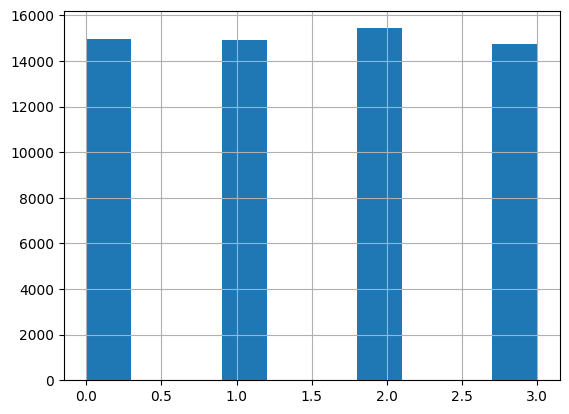

In [5]:
raw_60k['Best'].hist()

In [6]:
grouped = raw_60k.groupby('Query')

In [7]:
len(grouped), len(raw_60k)

(49643, 60055)

In [30]:
df = grouped.apply(lambda x: x)

# Calculate the indices where the splits should happen
total_rows = len(df)
split_indices = [int(total_rows*0.7)]

# Split the DataFrame
import numpy as np
splits = np.split(df, split_indices)

/scratch-ssd/lucelo/conda_envs/uqrm/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [31]:
len(splits)

2

In [33]:
len(splits[0]), len(splits[1])

(42038, 18017)

In [34]:
train = splits[0].reset_index(drop=True)
val = splits[1].reset_index(drop=True)

In [35]:
train.head(5)

,Query,Sample_0,Sample_1,Sample_2,Sample_3,Best
0,!doublecheck\n\nThere's no going back once a w...,"\n\nWomen are a person, they can be happy, the...","She's still your girlfriend, but she doesn't ...",Women who don't want to be around you are cra...,\n\nIt's not your fault.\n\nYou are the one wh...,2
1,""" I can't bear losing all my friends and ruini...",Start thinking about life in a positive and p...,You want to do something new? Get out there a...,Don't be afraid to say yes.\n\nThe next time ...,"Treat yourself to something special, even if ...",0
2,""" The biggest issue I have is Deoxys A's respi...",Deoxys A isn't nearly as big of a deal as man...,"Just play the decks you are comfortable with,...",\n\nDeo's are very powerful but have some nast...,It's still there and probably strong (but not...,0
3,"""(can't send woodchips through a pipeline!). ""...",The only alternative is to use renewable ener...,"The best option is hydrogen. Cheap, safe, rel...",\n\n1. Global Warming: The world can be powere...,<|endoftext|>,0
4,"""**The Prestige**""\n\nA lot of people have voi...","The Prestige is a movie about magic, and magi...",The Prestige was an effective film that was s...,The Prestige was a perfect film. It follows t...,The Prestige is a perfect film and is probabl...,2


In [36]:
def explode_rows(df):
    # Assuming that `df` is your DataFrame
    new_rows = []
    for _, row in tqdm(df.iterrows()):
        best_sample = f'Sample_{row["Best"]}'
        other_samples = [f'Sample_{i}' for i in range(4) if f'Sample_{i}' != best_sample]
        for sample in other_samples:
            new_row = {'chosen': f'Query: {row["Query"]} Summarization: {row[best_sample]}', \
                       'rejected': f'Query: {row["Query"]} Summarization: {row[sample]}'}
            new_rows.append(new_row)
    
    new_df = pd.DataFrame(new_rows).sample(frac=1).reset_index(drop=True)
    return new_df

In [37]:
train_processed = explode_rows(train)
test_processed = explode_rows(test)

42038it [00:02, 16036.91it/s]
18017it [00:01, 15901.14it/s]


In [38]:
train_processed.head(10)

,chosen,rejected
0,"Query: Before we started dating, he dropped ou...","Query: Before we started dating, he dropped ou..."
1,Query: Forgive me if I repeat what others have...,Query: Forgive me if I repeat what others have...
2,Query: &gt;I think what it's saying only appli...,Query: &gt;I think what it's saying only appli...
3,Query: Hello fellow redditors. I'm 18 years ol...,Query: Hello fellow redditors. I'm 18 years ol...
4,Query: Hello Reddit - \n\nI hope you can help....,Query: Hello Reddit - \n\nI hope you can help....
5,Query: On Monday I posted about seeing the Mat...,Query: On Monday I posted about seeing the Mat...
6,Query: I was diagnosed 2 months ago and never ...,Query: I was diagnosed 2 months ago and never ...
7,Query: I just need some general advice. I've b...,Query: I just need some general advice. I've b...
8,Query: (Throwaway because involved parties lur...,Query: (Throwaway because involved parties lur...
9,Query: &gt;Is NA starting to be better than EU...,Query: &gt;Is NA starting to be better than EU...


In [39]:
train.to_csv("./offline_60k_train_raw.csv", index=False, header=True)

In [40]:
test.to_csv("./offline_60k_test_raw.csv", index=False, header=True)

In [41]:
train_processed.to_csv("./offline_60k_train_processed.csv", index=False, header=True)

In [42]:
test_processed.to_csv("./offline_60k_test_processed.csv", index=False, header=True)

In [43]:
from datasets import load_dataset

In [44]:
!huggingface-cli login --token $HUGGINGFACE_WRITETOKEN

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /scratch-ssd/oatml/huggingface/token
Login successful


In [45]:
dataset = load_dataset("luckeciano/reddit-human-preferences")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [46]:
len(dataset)

2